In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')

class TimeSeriesCNN(nn.Module):
    def __init__(self):
        super(TimeSeriesCNN, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv1d(in_channels=16000, out_channels=64, kernel_size=3, padding=1).to(device)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1).to(device)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, padding=1).to(device)
        # Define a fully connected layer
        self.fc1 = nn.Linear(64 * 20, 1024).to(device)
        #self.linear4 = nn.Linear(1+20+1024, 2048).to(device)
        self.linear4 = nn.Linear(20+1024, 2048).to(device)
        self.linear5 = nn.Linear(2048,5012).to(device)
        self.linear6 = nn.Linear(5012, 5012).to(device)
        self.linear7 = nn.Linear(5012, 1).to(device)
        self.relu = nn.ReLU()
    def forward(self,time_data,time_scale,pep_size,pep_kch): # (batch_size, num_features, num_time_points)
        self.input_cnn = torch.stack([torch.zeros(20).to(torch.device(device))]*16000).to(torch.device(device))
        for index,item in enumerate(time_scale):
            if item == -1:
                continue
            if item > 16000:
                self.input_cnn[-1] = time_data[index]
            else:
                self.input_cnn[int(item)] = time_data[index]
        
        #time_series = torch.transpose(time_series,0,1)
        #timescale2 = torch.reshape(timescale,(1,6))
        #time_series = torch.concatenate((time_series,timescale2))
        #time_series = torch.transpose(time_series,0,1)
        x = F.relu(self.conv1(self.input_cnn))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.flatten()
        x = F.relu(self.fc1(x))
        pep_size = torch.tensor([pep_size],dtype=torch.float32).to(device)
        #combined = torch.cat((x,pep_size,pep_kch),dim=0).to(device)
        combined = torch.cat((x,pep_kch),dim=0).to(device)
        #combined = torch.cat((pep_kch,pep_size.resize(1)),dim=0).to(device)
        out = self.linear4(combined)
        out = self.relu(out)
        out = self.linear5(out)
        out = self.relu(out)
        out = self.linear6(out)
        out = self.relu(out)
        out = self.linear7(out)
        return out
    
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.hidden_dim = 1024
        self.num_layers = 6
        self.lstm1 = nn.LSTMCell(21, self.hidden_dim).to(torch.device('cuda'))
        self.lstm2 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm3 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm4 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm5 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm6 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm7 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm8 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm9 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm10 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm11 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.lstm12 = nn.LSTMCell(21+self.hidden_dim, self.hidden_dim).to(torch.device('cuda'))
        self.linear1 = nn.Linear(self.hidden_dim+5+20+1,1024).to(device)
        self.linear2= nn.Linear(1024, 2048).to(device)
        self.linear3 = nn.Linear(2048, 512).to(device)
        self.linear4 = nn.Linear(512, 256).to(device)
        self.linear5 = nn.Linear(256, 1).to(device)
        self.relu = nn.ReLU()
    def forward(self, time_series,sat,max_d,thor_max_d,pep_kch,pep_len,time_seconds,temp,ph):
        batch_size = 1  # Since we're processing a single sequence at a time
        h_t1 = torch.zeros(self.hidden_dim).to(device)
        c_t1 = torch.zeros(self.hidden_dim).to(device)
        h_t2 = torch.zeros(self.hidden_dim).to(device)
        c_t2 = torch.zeros(self.hidden_dim).to(device)
        h_t3 = torch.zeros(self.hidden_dim).to(device)
        c_t3 = torch.zeros(self.hidden_dim).to(device)
        h_t4 = torch.zeros(self.hidden_dim).to(device)
        c_t4 = torch.zeros(self.hidden_dim).to(device)
        h_t5 = torch.zeros(self.hidden_dim).to(device)
        c_t5 = torch.zeros(self.hidden_dim).to(device)
        h_t6 = torch.zeros(self.hidden_dim).to(device)
        c_t6 = torch.zeros(self.hidden_dim).to(device)
        h_t7 = torch.zeros(self.hidden_dim).to(device)
        c_t7 = torch.zeros(self.hidden_dim).to(device)
        h_t8 = torch.zeros(self.hidden_dim).to(device)
        c_t8 = torch.zeros(self.hidden_dim).to(device)
        h_t9 = torch.zeros(self.hidden_dim).to(device)
        c_t9 = torch.zeros(self.hidden_dim).to(device)
        h_t10 = torch.zeros(self.hidden_dim).to(device)
        c_t10 = torch.zeros(self.hidden_dim).to(device)
        h_t11 = torch.zeros(self.hidden_dim).to(device)
        c_t11 = torch.zeros(self.hidden_dim).to(device)
        h_t12 = torch.zeros(self.hidden_dim).to(device)
        c_t12 = torch.zeros(self.hidden_dim).to(device)
        h_t1, c_t1 = self.lstm1(torch.cat((time_series[0],time_seconds[0].reshape(1))), (h_t1, c_t1))
        lstm_input_2 = torch.cat((time_series[1], h_t1), dim=0)
        h_t2, c_t2 = self.lstm2(torch.cat((lstm_input_2,time_seconds[1].reshape(1))), (h_t2, c_t2))
        lstm_input_3 = torch.cat((time_series[2], h_t2), dim=0)
        h_t3, c_t3 = self.lstm3(torch.cat((lstm_input_3,time_seconds[2].reshape(1))), (h_t3, c_t3))
        lstm_input_4 = torch.cat((time_series[3], h_t3), dim=0)
        h_t4, c_t4 = self.lstm4(torch.cat((lstm_input_4,time_seconds[3].reshape(1))), (h_t4, c_t4))
        lstm_input_5 = torch.cat((time_series[4], h_t4), dim=0)
        h_t5, c_t5 = self.lstm5(torch.cat((lstm_input_5,time_seconds[4].reshape(1))), (h_t5, c_t5))
        lstm_input_6 = torch.cat((time_series[5], h_t5), dim=0)
        h_t6, c_t6 = self.lstm6(torch.cat((lstm_input_6,time_seconds[5].reshape(1))), (h_t6, c_t6))
        lstm_input_7 = torch.cat((time_series[6], h_t6), dim=0)
        h_t7, c_t7 = self.lstm7(torch.cat((lstm_input_7,time_seconds[6].reshape(1))), (h_t7, c_t7))
        lstm_input_8 = torch.cat((time_series[7], h_t7), dim=0)
        h_t8, c_t8 = self.lstm8(torch.cat((lstm_input_8,time_seconds[7].reshape(1))), (h_t8, c_t8))
        lstm_input_9 = torch.cat((time_series[8], h_t8), dim=0)
        h_t9, c_t9 = self.lstm9(torch.cat((lstm_input_9,time_seconds[8].reshape(1))), (h_t9, c_t9))
        lstm_input_10 = torch.cat((time_series[9], h_t9), dim=0)
        h_t10, c_t10 = self.lstm10(torch.cat((lstm_input_10,time_seconds[9].reshape(1))), (h_t10, c_t10))
        lstm_input_11 = torch.cat((time_series[10], h_t10), dim=0)
        h_t11, c_t11 = self.lstm11(torch.cat((lstm_input_11,time_seconds[10].reshape(1))), (h_t11, c_t11))
        lstm_input_12 = torch.cat((time_series[11], h_t11), dim=0)
        h_t12, c_t12 = self.lstm12(torch.cat((lstm_input_12,time_seconds[11].reshape(1))), (h_t12, c_t12))
        sat = torch.tensor([sat],dtype=torch.float32).to(device)
        max_d = torch.tensor([max_d],dtype=torch.float32).to(device)
        pep_len = torch.tensor([pep_len],dtype=torch.float32).to(device)
        thor_max_d = torch.tensor([thor_max_d],dtype=torch.float32).to(device)
        temp = torch.tensor([temp],dtype=torch.float32).to(device)
        ph = torch.tensor([ph],dtype=torch.float32).to(device)
        combined = torch.cat((h_t12,sat,max_d,thor_max_d,pep_kch,pep_len,temp,ph),dim=0).to(device)
        out = self.linear1(combined)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        out = self.relu(out)
        out = self.linear4(out)
        out = self.relu(out)
        out = self.linear5(out)
        return out



In [2]:
def graph_data(predicted_values,real_values,feature_values,title='Predicted vs Real Values'):
             
            
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd
    from sklearn.metrics import r2_score
    from sklearn.linear_model import LinearRegression
    # Creating a DataFrame for easy plotting with seaborn
    # Creating a DataFrame for easy plotting with seaborn
    # Creating a DataFrame for easy plotting with seaborn
    data = pd.DataFrame({
        'Predicted': predicted_values,
        'Real': real_values,
        'Feature': feature_values
    })
    
    # Scatter plot with color-coded feature
    plt.figure(figsize=(12, 12))  # Make the figure more square
    scatter = sns.scatterplot(data=data, x='Real', y='Predicted', hue='Feature', palette='viridis', s=100)
    
    # Manually create a trendline with slope = 1
    trendline = np.array(real_values)
    
    # Calculating R² value
    r2 = r2_score(np.array(predicted_values), trendline)
    from sklearn.metrics import mean_squared_error
    rmse = math.sqrt(mean_squared_error(predicted_values,real_values))
    # Plotting the trendline
    
    
    # Ensuring the plot is square and axes are equal
    min_value = 0
    max_value = max(max(real_values), max(predicted_values))+5
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
    plt.plot(real_values, trendline, color='red', label=f'Trendline (y=x, R² = {r2:.2f}) STD_pep = {np.std(np.array(predicted_values)-np.array(real_values)):.2f} STD_res = {np.std((np.array(predicted_values)-np.array(real_values))/np.array(feature_values)):.2f} RMSE = {rmse:.2f}')
    # Customizing the plot
    plt.title(title)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, title='Peptide Len', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adding a grid for better visualization
    plt.grid(True)
    plt.savefig(f"graph/{title}.png", dpi=300, bbox_inches='tight')
    # Showing the plot
    plt.show()


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class TimeSeriesCNN(nn.Module):
    def __init__(self):
        super(TimeSeriesCNN, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv1d(in_channels=6, out_channels=16, kernel_size=3, padding=1).to(device)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1).to(device)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1).to(device)
        # Define a fully connected layer
        self.fc1 = nn.Linear(64 * 20, 128).to(device)
        self.linear4 = nn.Linear(128+1+20, 1024).to(device)
        #self.linear4 = nn.Linear(1+20, 1024).to(device)
        self.linear5 = nn.Linear(1024,512).to(device)
        self.linear6 = nn.Linear(512, 256).to(device)
        self.linear7 = nn.Linear(256, 1).to(device)
        self.relu = nn.ReLU()
    def forward(self,  time_series,pep_size,pep_kch): # (batch_size, num_features, num_time_points)
        x = F.relu(self.conv1(time_series[0:5]))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.flatten()
        x = F.relu(self.fc1(x))
        pep_size = torch.tensor([pep_size],dtype=torch.float32).to(device)
        combined = torch.cat((x,pep_size,pep_kch),dim=0).to(device)
        #combined = torch.cat((pep_size,pep_kch),dim=0).to(device)
        out = self.linear4(combined)
        out = self.relu(out)
        out = self.linear5(out)
        out = self.relu(out)
        out = self.linear6(out)
        out = self.relu(out)
        out = self.linear7(out)
        return out

In [4]:
import math
import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import pandas as pd
import torch
from torch.utils.data import Dataset
import numpy as np

class HDXDataset(Dataset):
    def __init__(self, protein_list, seq_length=100, pep_num=100, time_num=6,pep_len=20):
        self.protein_list = protein_list
        self.seq_length = seq_length
        self.number_of_peptides = pep_num
        self.number_of_time_points = time_num
        self.peptide_length=pep_len
    def __len__(self):
        return len(self.protein_list)


    def generate_pep_protection_factors(self,padded_data_dict):

        pep_factors = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            total  = torch.sum(padded_data_dict['log_P'][start-1:end])
            pep_factors.append(total)

        return torch.tensor(pep_factors,dtype=torch.float).to(device)

    def create_log_time_data_tensor(self,padded_data_dict):

        time_data = []
        for i in range(self.number_of_peptides):
            time_data_peptide = torch.log10(torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float))
            time_data_peptide = torch.nan_to_num(time_data_peptide, nan=-10)
            time_data_peptide[time_data_peptide <= -10] = -10
            blank = torch.ones((self.number_of_time_points,20))
            time_data_peptide = torch.div(blank,time_data_peptide)
            time_data_peptide = torch.mul(time_data_peptide,-1)
            time_data_peptide[time_data_peptide <= 0.1] = 0
            time_data.append(time_data_peptide)

        return time_data

    def get_mix_value(self,padded_data_dict):

        time_data = []
        centroids = self.get_centroid_value(padded_data_dict)
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            if start == -1:
                continue

            centroid_val = centroids[i][0]+(end-start+1)
            centroid_val = 0
            time_data_peptide = torch.log10(torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float))
            time_data_peptide = torch.nan_to_num(time_data_peptide, nan=-10)
            time_data_peptide[time_data_peptide <= -10] = -10
            blank = torch.ones((self.number_of_time_points,20))
            time_data_peptide = torch.div(blank,time_data_peptide)
            time_data_peptide = torch.mul(time_data_peptide,-1)
            time_data_peptide[time_data_peptide <= 0.1] = 0
            value = 0
            for index, time in enumerate(time_data_peptide):
                if torch.equal(time,torch.zeros(20)) and value == 0:
                    value = index
            time_data_peptide[value] = torch.zeros(20).to(torch.device(device))
            time_data_peptide[value][-1] = centroid_val
            time_data.append(time_data_peptide)
        return time_data
    
    def create_spaced_log_time_data_tensor(self,padded_data_dict,peptide_len_tensor):
        time_data = self.create_log_time_data_tensor(padded_data_dict)
        time_points = torch.tensor([padded_data_dict[f'peptide_{i}']['time'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        all_peptides = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            new_time_data_peptide = [torch.zeros(20).to(torch.device(device))]*16000
            for index,x in enumerate(time_points[i]):

                if start == -1:
                    continue
                if int(x) > 16000:
                    new_time_data_peptide[-1] = torch.tensor(time_data[i][index]).to(torch.device(device))
                else:
                    new_time_data_peptide[int(x)] = torch.tensor(time_data[i][index]).to(torch.device(device))
                    
            stack = torch.stack(new_time_data_peptide).to(torch.device(device))
            all_peptides.append(stack)

        return all_peptides

    def generate_pep_protection_factors_tensor(self,padded_data_dict):

        pep_factors = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            if start == -1:
                total = 0
            else:
                total  = torch.sum(padded_data_dict['log_P'][start-1:end])
            pep_factors.append(total)

        return torch.tensor(pep_factors,dtype=torch.float).to(device)
    
    def get_centroid_value(self,padded_data_dict):
        all_centroids = []
        for i in range(self.number_of_peptides):
            centroids = []
            time_data_peptide = torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float)
            for time_point_list in time_data_peptide:
                mul_matrix = torch.tensor(range(20),dtype=torch.int32)
                holder = torch.mul(time_point_list,mul_matrix)
                cen = torch.sum(holder)
                centroids.append(cen)
            all_centroids.append(centroids)

        return torch.tensor(all_centroids,dtype=torch.float32)

    def generate_pep_list_kch_tensor(self,padded_data_dict,padding_size):

        pep_kch = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            kch = torch.tensor(padded_data_dict['log_kch'][start-1:end],dtype=torch.float32)
            kch = torch.pow(10,kch)
            kch = torch.nan_to_num(kch, nan=0)   
            kch[kch >= 10000] = 0
            if start == -1:
                kch = torch.zeros(padding_size).to(torch.device(device))
            else:
                kch = kch.to(torch.device(device))
                kch =  torch.concatenate((kch,torch.zeros(padding_size - kch.size()[0]).to(torch.device(device)))).to(torch.device(device))
            pep_kch.append(kch)

        return pep_kch

    def get_fix_kch_tensor(self,padded_data_dict):

        pep_kch = []
        for i in range(self.seq_length):
            kch = torch.tensor(padded_data_dict['log_kch'][i],dtype=torch.float32)
            kch = torch.pow(10,kch)
            kch = torch.nan_to_num(kch, nan=0)
            kch[kch >= 10000] = 0
            pep_kch.append(kch)

        return pep_kch
    
    def get_peptide_coverage_tensor(self,padded_data_dict):

        peptides_coverage =[]
        for i in range(self.number_of_peptides):
            coverage = torch.zeros(self.seq_length)
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            coverage[start-1:end] = 1
            coverage = torch.tensor(coverage).to(torch.device(device))
            peptides_coverage.append(coverage)

        return peptides_coverage


    def __getitem__(self, idx):

        data_dict = self.protein_list[idx].copy()
        padded_data_dict = self.padding(data_dict)
        #padded_data_dict = data_dict
        #print([padded_data_dict[f'peptide_{i}']['time'] for i in range(self.number_of_peptides)])
        time_points = torch.tensor([padded_data_dict[f'peptide_{i}']['time'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        start = torch.tensor([padded_data_dict[f'peptide_{i}']['start'] for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device))
        end = torch.tensor([padded_data_dict[f'peptide_{i}']['end'] for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device)),
        saturation = torch.tensor([padded_data_dict['saturation'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        max_d = torch.tensor([padded_data_dict[f'peptide_{i}']['max_d'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        theo_max_d = torch.tensor([padded_data_dict[f'peptide_{i}']['theo_max_d'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        peptide_len_tensor = torch.tensor([padded_data_dict[f'peptide_{i}']['end'] - padded_data_dict[f'peptide_{i}']['start'] + 1 for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device))

        dict_return =  {
            'start': start,
            'end': end,
            'peptide_sequence': [padded_data_dict[f'peptide_{i}']['sequence'] for i in range(self.number_of_peptides)],
            'seq_length': self.seq_length,
            'pep_num': self.number_of_peptides,
            'protein_sequence': padded_data_dict['protein_sequence'],
            'fix_kch': self.get_fix_kch_tensor(padded_data_dict),
            'isotope_log': self.create_log_time_data_tensor(padded_data_dict),
            'log_P_pep': self.generate_pep_protection_factors_tensor(padded_data_dict),
            'peptide_len': peptide_len_tensor,
            'kch_pep_list': self.generate_pep_list_kch_tensor(padded_data_dict,20),
            'peptide_coverage': self.get_peptide_coverage_tensor(padded_data_dict),
            'time_scale':time_points,
            'log_P':padded_data_dict['log_P'],
            'pep_log_p': self.generate_pep_protection_factors(padded_data_dict),
            'centroid': self.get_centroid_value(padded_data_dict),
            'mix': self.get_mix_value(padded_data_dict),
            'theo_max_d': theo_max_d,
            'max_d': max_d,
            'saturation': saturation,
            'ph':padded_data_dict['ph'],
            'temp':padded_data_dict['temp']
        }

        return dict_return
            #'spaced_scale': self.create_spaced_log_time_data_tensor(padded_data_dict,peptide_len_tensor)

    def padding(self, data_dict):


        # pad the protein sequence to the same length,
        X_num = self.seq_length - len(data_dict['protein_sequence'])
        data_dict['protein_sequence'] = data_dict['protein_sequence']+"X"*X_num
        
        data_dict['log_kch'] = torch.tensor(np.hstack((data_dict['log_kch'], np.full(X_num, -1))), dtype=torch.float32).to(torch.device(device))
        data_dict['log_P'] =  torch.tensor(np.hstack((data_dict['log_P'], np.full(X_num, -1))), dtype=torch.float32).to(torch.device(device))
        for i in range(self.number_of_peptides):
            if f'peptide_{i}' not in data_dict.keys():
                pep_dict = {
                    'start': -1,
                    'end': -1,
                    'sequence': self.seq_length*"X",
                    'time': [-1]*self.number_of_time_points,
                    'isotope': [[0.00000000000000000001]*20]*self.number_of_time_points,
                    'saturation' : -1,
                    'max_d': -1,
                    'theo_max_d': -1
                }
                data_dict[f'peptide_{i}'] = pep_dict
            else:
                pep_dict = data_dict[f'peptide_{i}']
                pep_dict['sequence'] += "X"*(self.peptide_length - len(pep_dict['sequence']))
                if pep_dict['time'][0] == math.inf:
                    pep_dict['time'] = pep_dict['time'][1:]
                for j in range(self.number_of_time_points):
                    
                    if j >= len(pep_dict['time']):
                        pep_dict['time'].append(-1)
                        pep_dict['isotope'].append([0.00000000000000000001]*20)
                data_dict[f'peptide_{i}'] = pep_dict

        return data_dict



In [5]:
from torch_geometric.data import Data
# Basic parameters
output_size = 100
seq_length = 35
output_size = seq_length
pep_num = 20
time_num = 12

# Prepare dataset
protein_list1 = [torch.load(f'data/ph_log_ran_0.3/simulated_data_{i}.pt') for i in range(1,90000)]
#protein_list2 = [torch.load(f'pfnet_data_6tps_100res_100peps_noise_10p/simulated_data_{i}.pt') for i in range(180)]
pre_dataset = HDXDataset(protein_list1, seq_length=seq_length, pep_num=pep_num, time_num=time_num)

torch.set_printoptions(profile="full")
dataset = []
for index, item in enumerate(pre_dataset):
    print(index,"start")
    peptide_coverage= item['peptide_coverage']
    time_data_log = item['isotope_log']
    log_P = item['log_P']
    log_P_pep = item['log_P_pep']
    kch_pep_list = item['kch_pep_list']
    pep_num = item['pep_num']
    peptide_len = item['peptide_len']
    time_scale = item['time_scale']
    fix_kch = item['fix_kch']
    starts = item['start']
    ends = item['end'][0]
    pep_log_p = item['pep_log_p']
    centroid = item['centroid']
    mix = item['mix']
    theo_max_d = item['theo_max_d']
    max_d = item['max_d']
    saturation = item['saturation']
    ph = item['ph']
    temp = item['temp']
    #spaced_scale = item['spaced_scale']
    #spaced_time = item['spaced_scale']   spaced_time = spaced_time[i]
    cut = 0
    for i in range(pep_num):
        if peptide_len[i] < 2:
            continue
        if torch.unique(torch.tensor(time_scale[i])).size(dim=0) <= 4:
            continue
        #if torch.unique(time_scale[i]).size(dim=0) <= 5:
        #    continue
        data = Data(temp=temp,ph=ph,labels = pep_log_p[i],theo_max_d=theo_max_d[i],max_d=max_d[i],saturation=saturation[i], starts=starts[i],ends=ends[i],mix=mix[i], time_data=time_data_log[i],time_scale=time_scale[i], peptide_len = peptide_len[i],kch=fix_kch,peptide_kch = kch_pep_list[i]).to(torch.device(device))
        dataset.append(data)
np.random.shuffle(dataset)

/tmp/ipykernel_1207/680680131.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kch = torch.tensor(padded_data_dict['log_kch'][i],dtype=torch.float32)
/tmp/ipykernel_1207/680680131.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  time_data_peptide = torch.log10(torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float))
/tmp/ipykernel_1207/680680131.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kch = torch.tensor(padded_data_dict['log_kch'][star

0 start
1 start
2 start
3 start
4 start
5 start
6 start
7 start
8 start
9 start
10 start
11 start
12 start
13 start
14 start
15 start
16 start
17 start
18 start
19 start
20 start
21 start
22 start
23 start
24 start
25 start
26 start
27 start
28 start
29 start
30 start
31 start
32 start
33 start
34 start
35 start
36 start
37 start
38 start
39 start
40 start
41 start
42 start
43 start
44 start
45 start
46 start
47 start
48 start
49 start
50 start
51 start
52 start
53 start
54 start
55 start
56 start
57 start
58 start
59 start
60 start
61 start
62 start
63 start
64 start
65 start
66 start
67 start
68 start
69 start
70 start
71 start
72 start
73 start
74 start
75 start
76 start
77 start
78 start
79 start
80 start
81 start
82 start
83 start
84 start
85 start
86 start
87 start
88 start
89 start
90 start
91 start
92 start
93 start
94 start
95 start
96 start
97 start
98 start
99 start
100 start
101 start
102 start
103 start
104 start
105 start
106 start
107 start
108 start
109 start
110 start


In [ ]:
print(len(dataset))

In [20]:
import math
import torch.optim as optim


#model = LSTM()
#peptides = 0


#model = TimeSeriesCNN()
#model.load_state_dict(torch.load("lstm"))
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)
#peptides = 0
# Define optimizer and loss function
criterion = nn.MSELoss().to(torch.device(device))
optimizer = optim.Adam(model.parameters(), lr=0.0001)#0.000001
torch.autograd.set_detect_anomaly(True)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
# Training process


num_epochs = 50000
np.random.shuffle(dataset)
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for index,data in enumerate(dataset):
        if data.labels == -1:
            continue
        if data.peptide_len < 2 or data.peptide_len > 15:
            continue
        peptides +=1
        optimizer.zero_grad()
        out = model(data.mix,data.saturation,data.max_d,data.theo_max_d,data.peptide_kch,data.peptide_len,data.time_scale,data.temp,data.ph)
        #out = model(data.time_data,data.time_scale,data.peptide_len,data.peptide_kch)
        loss = criterion(out[0], data.labels)
        #print(loss.item(),math.sqrt(loss.item()))
        #print(out.cpu().detach().numpy()[0], data.labels.cpu().detach().numpy(),data.peptide_len.cpu().detach().numpy())
        
        if index%200 == 0 :
            print(f'{total_loss /200 :.4f}')
            total_loss = 0
            print(loss.item(),math.sqrt(loss.item()))
        #if index%2000 == 0 :
        #    dataset2 = run_dhfr(dataset2)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(dataset):.4f}')

101955585
0.0000
57.932926177978516 7.611368219839224
117.5206
50.80738067626953 7.127929620602993
129.6131
92.17374420166016 9.600715817149268
142.2648
33.31822204589844 5.772193867664048
114.0338
0.07628607749938965 0.27619934377074407
120.0452
8.11043930053711 2.8478833017764456
113.7140
112.03299713134766 10.584564097370645
121.6026
109.55806732177734 10.466998964449044
112.6738
21.06810188293457 4.590000205112694
126.7241
14.566529273986816 3.816612277136206
113.0385
7.213985443115234 2.685886342181149
123.6236
24.251333236694336 4.924564268713968
126.4742
150.92807006835938 12.285278591401962
112.5755
39.71950912475586 6.302341558877609
115.7545
24.078102111816406 4.906944274374471
136.2697
1.160988450050354 1.077491740130918
129.6649
0.41902291774749756 0.6473197955782733
138.5997
487.554443359375 22.080635030709036
117.2137
0.5643841028213501 0.7512550184999433
122.1484
16.9437255859375 4.116275693626157
138.2267
25.044307708740234 5.004428809438719
113.9574
68.65098571777344 8

KeyboardInterrupt: 

In [ ]:
torch.save(model, "lstm_all_time_cen_noise_0_to_12")

/tmp/ipykernel_1207/416406879.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if torch.unique(torch.tensor(data.time_scale)).size(dim=0) <= 4:


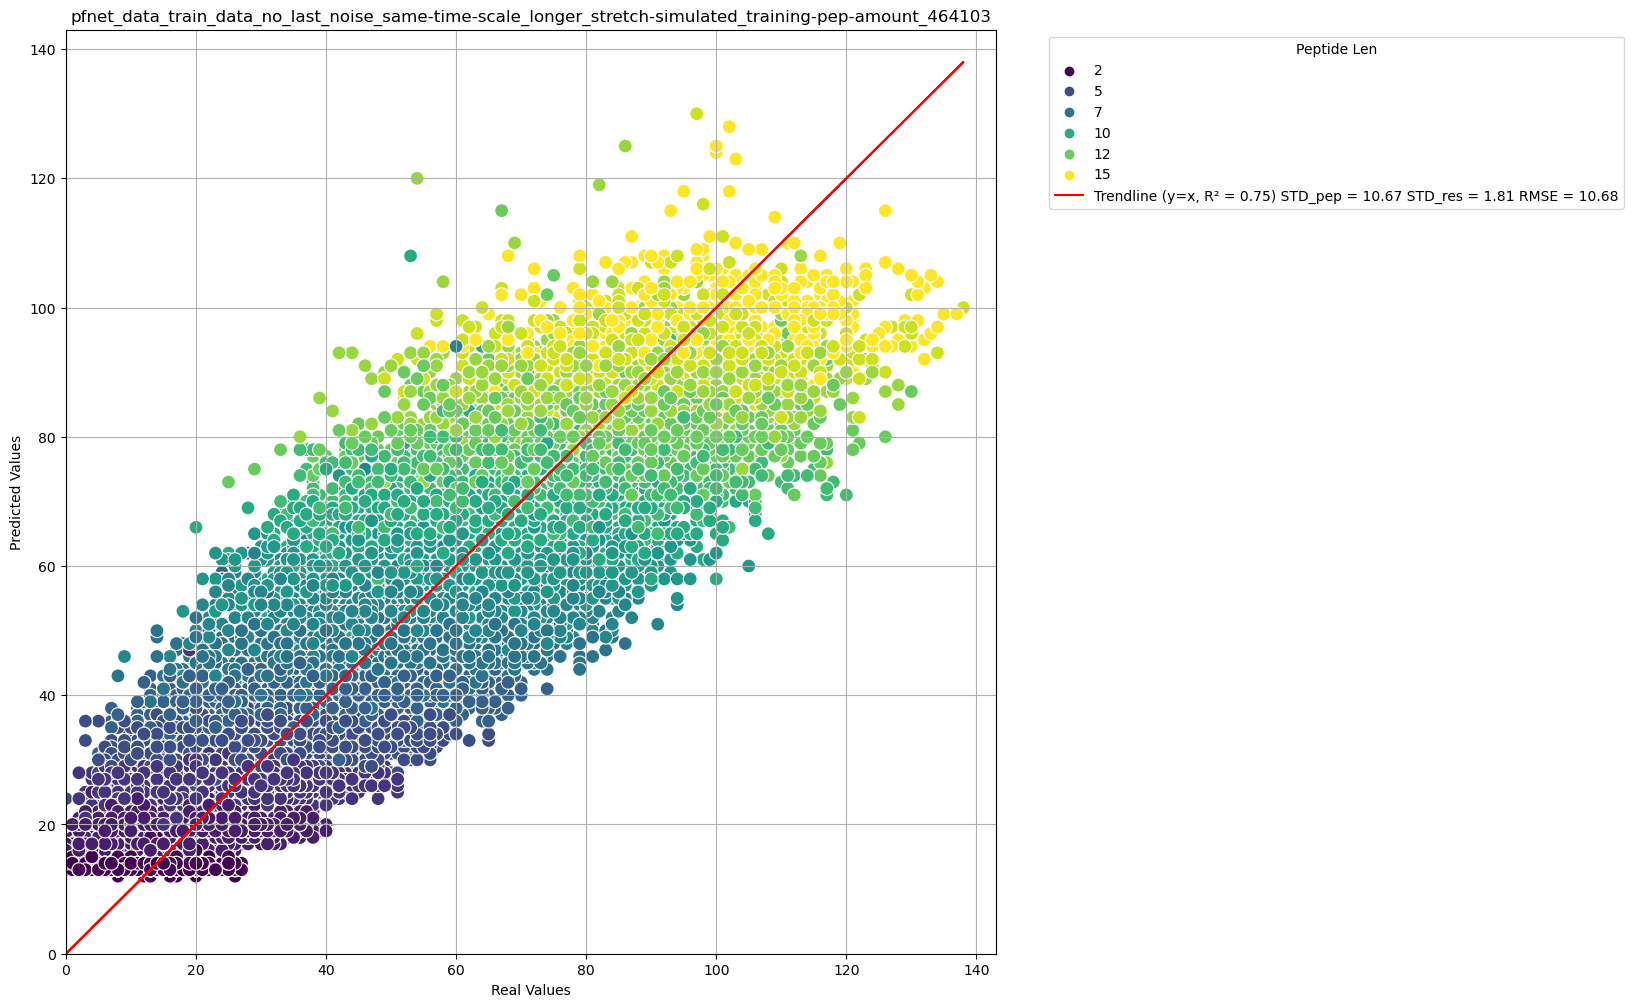

In [21]:
from torch_geometric.data import Data
# Basic parameters
output_size = 100
seq_length = 35
output_size = seq_length
pep_num = 20
time_num = 12
if ("yes"=="ys"):
    # Prepare dataset
    protein_list1 = [torch.load(f'data/ph_log_ran_0.3/simulated_data_{i}.pt') for i in range(90000,95000)]
    #protein_list2 = [torch.load(f'pfnet_data_6tps_100res_100peps_noise_10p/simulated_data_{i}.pt') for i in range(180)]
    pre_dataset = HDXDataset(protein_list1, seq_length=seq_length, pep_num=pep_num, time_num=time_num)
    torch.set_printoptions(profile="full")
    dataset_eval = []
    for index, item in enumerate(pre_dataset):
        peptide_coverage= item['peptide_coverage']
        time_data_log = item['isotope_log']
        log_P = item['log_P']
        log_P_pep = item['log_P_pep']
        kch_pep_list = item['kch_pep_list']
        pep_num = item['pep_num']
        peptide_len = item['peptide_len']
        time_scale = item['time_scale']
        fix_kch = item['fix_kch']
        starts = item['start']
        ends = item['end'][0]
        pep_log_p = item['pep_log_p']
        centroid = item['centroid']
        mix = item['mix']
        theo_max_d = item['theo_max_d']
        max_d = item['max_d']
        saturation = item['saturation']
        ph = item['ph']
        temp = item['temp']
        for i in range(pep_num):
            if peptide_len[i] < 2:
                continue
            #if torch.unique(time_scale[i]).size(dim=0) <= 5:
            #    continue
            data = Data(temp=temp,ph=ph,labels = pep_log_p[i],theo_max_d=theo_max_d[i],max_d=max_d[i],saturation=saturation[i], starts=starts[i],ends=ends[i],mix=mix[i], time_data=time_data_log[i],time_scale=time_scale[i], peptide_len = peptide_len[i],kch=fix_kch,peptide_kch = kch_pep_list[i]).to(torch.device(device))
            dataset_eval.append(data)
predicted_values = []
real_values = []
feature_values = []

model.eval()
with torch.no_grad():
     for data in dataset_eval:
        if data.peptide_len < 2 or data.peptide_len > 15:
            continue
        if torch.unique(torch.tensor(data.time_scale)).size(dim=0) <= 4:
            continue
        out = model(data.mix,data.saturation,data.max_d,data.theo_max_d,data.peptide_kch,data.peptide_len,data.time_scale,data.temp,data.ph)
        #print(out.cpu().detach().numpy()[0], data.labels.cpu().detach().numpy(),data.starts.reshape(1).cpu().detach().numpy()[0],data.ends.reshape(1).cpu().detach().numpy()[0])
        predicted_values.append(int(out.cpu().detach().numpy()[0]))
        real_values.append(int(data.labels.cpu().detach().numpy()))
        feature_values.append(int(data.peptide_len.cpu().detach().numpy()))
#from sklearn.metrics import mean_squared_error
#print(math.sqrt(mean_squared_error(predicted_values,real_values)))

graph_data(predicted_values,real_values,feature_values,f"pfnet_data_train_data_no_last_noise_same-time-scale_longer_stretch-simulated_training-pep-amount_{peptides}")

#10.92 last
#10.72
#10.68
#

In [ ]:

import math
import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import pandas as pd
import torch
from torch.utils.data import Dataset
import numpy as np

class HDXDataset2(Dataset):
    def __init__(self, protein_list, seq_length=100, pep_num=100, time_num=6,pep_len=20):
        self.protein_list = protein_list
        self.seq_length = seq_length
        self.number_of_peptides = pep_num
        self.number_of_time_points = time_num
        self.peptide_length=pep_len
    def __len__(self):
        return len(self.protein_list)


    def generate_pep_protection_factors(self,padded_data_dict):

        pep_factors = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            total  = torch.sum(padded_data_dict['log_P'][start-1:end])
            pep_factors.append(total)

        return torch.tensor(pep_factors,dtype=torch.float).to(device)

    def create_log_time_data_tensor(self,padded_data_dict):

        time_data = []
        for i in range(self.number_of_peptides):
            if self.number_of_time_points < len(padded_data_dict[f'peptide_{i}']['time']):
                time_data.append(torch.ones((self.number_of_time_points,20)))
                continue
            
            time_data_peptide = torch.log10(torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float))
            time_data_peptide = torch.nan_to_num(time_data_peptide, nan=-10)
            time_data_peptide[time_data_peptide <= -10] = -10
            blank = torch.ones((self.number_of_time_points,20))
            time_data_peptide = torch.div(blank,time_data_peptide)
            time_data_peptide = torch.mul(time_data_peptide,-1)
            time_data_peptide[time_data_peptide <= 0.1] = 0
            time_data.append(time_data_peptide)

        return time_data

    def get_mix_value(self,padded_data_dict):

        time_data = []
        centroids = self.get_centroid_value(padded_data_dict)
        for i in range(self.number_of_peptides):
            if self.number_of_time_points < len(padded_data_dict[f'peptide_{i}']['time']):
                time_data.append(torch.ones((self.number_of_time_points,20)))
                continue

            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            if start == -1:
                continue
            centroid_val = centroids[i][0] + (end-start+1)
            centroid_val = 0
            time_data_peptide = torch.log10(torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float))
            time_data_peptide = torch.nan_to_num(time_data_peptide, nan=-10)
            time_data_peptide[time_data_peptide <= -10] = -10
            blank = torch.ones((self.number_of_time_points,20))
            time_data_peptide = torch.div(blank,time_data_peptide)
            time_data_peptide = torch.mul(time_data_peptide,-1)
            time_data_peptide[time_data_peptide <= 0.1] = 0
            value = 0
            for index, time in enumerate(time_data_peptide):
                if torch.equal(time,torch.zeros(20)) and value == 0:
                    value = index
            time_data_peptide[value] = torch.zeros(20).to(torch.device(device))
            time_data_peptide[value][-1] = centroid_val
            time_data.append(time_data_peptide)
        return time_data
    
    def create_spaced_log_time_data_tensor(self,padded_data_dict,peptide_len_tensor):
        time_data = self.create_log_time_data_tensor(padded_data_dict)
        time_points = torch.tensor([padded_data_dict[f'peptide_{i}']['time'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        all_peptides = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            new_time_data_peptide = [torch.zeros(20).to(torch.device(device))]*16000
            for index,x in enumerate(time_points[i]):

                if start == -1:
                    continue
                if int(x) > 16000:
                    new_time_data_peptide[-1] = torch.tensor(time_data[i][index]).to(torch.device(device))
                else:
                    new_time_data_peptide[int(x)] = torch.tensor(time_data[i][index]).to(torch.device(device))
                    
            stack = torch.stack(new_time_data_peptide).to(torch.device(device))
            all_peptides.append(stack)

        return all_peptides

    def generate_pep_protection_factors_tensor(self,padded_data_dict):

        pep_factors = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            if start == -1:
                total = 0
            else:
                total  = torch.sum(padded_data_dict['log_P'][start-1:end])
            pep_factors.append(total)

        return torch.tensor(pep_factors,dtype=torch.float).to(device)
    
    def get_centroid_value(self,padded_data_dict):
        all_centroids = []
        for i in range(self.number_of_peptides):            
            centroids = []
            time_data_peptide = torch.tensor(padded_data_dict[f'peptide_{i}']['isotope'],dtype=torch.float)
            if self.number_of_time_points < len(padded_data_dict[f'peptide_{i}']['time']):
                centroids = [torch.ones(1) for x in range(0,self.number_of_time_points)]
                all_centroids.append(centroids)
                continue
            
            for time_point_list in time_data_peptide:
                mul_matrix = torch.tensor(range(20),dtype=torch.int32)
                holder = torch.mul(time_point_list,mul_matrix)
                cen = torch.sum(holder)
                centroids.append(cen)
            all_centroids.append(centroids)

        return torch.tensor(all_centroids,dtype=torch.float32)

    def generate_pep_list_kch_tensor(self,padded_data_dict,padding_size):

        pep_kch = []
        for i in range(self.number_of_peptides):
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            kch = torch.tensor(padded_data_dict['log_kch'][start-1:end],dtype=torch.float32)
            kch = torch.pow(10,kch)
            kch = torch.nan_to_num(kch, nan=0)   
            kch[kch >= 10000] = 0
            if start == -1:
                kch = torch.zeros(padding_size).to(torch.device(device))
            else:
                kch = kch.to(torch.device(device))
                kch =  torch.concatenate((kch,torch.zeros(padding_size - kch.size()[0]).to(torch.device(device)))).to(torch.device(device))
            pep_kch.append(kch)

        return pep_kch

    def get_fix_kch_tensor(self,padded_data_dict):

        pep_kch = []
        for i in range(self.seq_length):
            kch = torch.tensor(padded_data_dict['log_kch'][i],dtype=torch.float32)
            kch = torch.pow(10,kch)
            kch = torch.nan_to_num(kch, nan=0)
            kch[kch >= 10000] = 0
            pep_kch.append(kch)

        return pep_kch
    
    def get_peptide_coverage_tensor(self,padded_data_dict):

        peptides_coverage =[]
        for i in range(self.number_of_peptides):
            coverage = torch.zeros(self.seq_length)
            start = padded_data_dict[f'peptide_{i}']['start']
            end = padded_data_dict[f'peptide_{i}']['end']
            coverage[start-1:end] = 1
            coverage = torch.tensor(coverage).to(torch.device(device))
            peptides_coverage.append(coverage)

        return peptides_coverage


    def __getitem__(self, idx):

        data_dict = self.protein_list[idx].copy()
        padded_data_dict = self.padding(data_dict)
        #padded_data_dict = data_dict
        #print([padded_data_dict[f'peptide_{i}']['time'] for i in range(self.number_of_peptides)])
        time_points = [padded_data_dict[f'peptide_{i}']['time'] for i in range(self.number_of_peptides)]
        start = torch.tensor([padded_data_dict[f'peptide_{i}']['start'] for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device))
        end = torch.tensor([padded_data_dict[f'peptide_{i}']['end'] for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device)),
        peptide_len_tensor = torch.tensor([padded_data_dict[f'peptide_{i}']['end'] - padded_data_dict[f'peptide_{i}']['start'] + 1 for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device))
        saturation = torch.tensor([padded_data_dict[f'peptide_{i}']['saturation'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        max_d = torch.tensor([padded_data_dict[f'peptide_{i}']['max_d'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        theo_max_d = torch.tensor([padded_data_dict[f'peptide_{i}']['theo_max_d'] for i in range(self.number_of_peptides)], dtype=torch.float32).to(torch.device(device))
        peptide_len_tensor = torch.tensor([padded_data_dict[f'peptide_{i}']['end'] - padded_data_dict[f'peptide_{i}']['start'] + 1 for i in range(self.number_of_peptides)], dtype=torch.int64).to(torch.device(device))

        dict_return =  {
            'start': start,
            'end': end,
            'peptide_sequence': [padded_data_dict[f'peptide_{i}']['sequence'] for i in range(self.number_of_peptides)],
            'seq_length': self.seq_length,
            'pep_num': self.number_of_peptides,
            'protein_sequence': padded_data_dict['protein_sequence'],
            'fix_kch': self.get_fix_kch_tensor(padded_data_dict),
            'isotope_log': self.create_log_time_data_tensor(padded_data_dict),
            'log_P_pep': self.generate_pep_protection_factors_tensor(padded_data_dict),
            'peptide_len': peptide_len_tensor,
            'kch_pep_list': self.generate_pep_list_kch_tensor(padded_data_dict,20),
            'peptide_coverage': self.get_peptide_coverage_tensor(padded_data_dict),
            'time_scale':time_points,
            'log_P':padded_data_dict['log_P'],
            'pep_log_p': self.generate_pep_protection_factors(padded_data_dict),
            'centroid': self.get_centroid_value(padded_data_dict),
            'mix': self.get_mix_value(padded_data_dict),
            'theo_max_d': theo_max_d,
            'max_d': max_d,
            'saturation': saturation
        }


        return dict_return
            #'spaced_scale': self.create_spaced_log_time_data_tensor(padded_data_dict,peptide_len_tensor)

    def padding(self, data_dict):


        # pad the protein sequence to the same length,
        X_num = self.seq_length - len(data_dict['protein_sequence'])
        data_dict['protein_sequence'] = data_dict['protein_sequence']+"X"*X_num
        
        data_dict['log_kch'] = torch.tensor(np.hstack((data_dict['log_kch'], np.full(X_num, -1))), dtype=torch.float32).to(torch.device(device))
        data_dict['log_P'] =  torch.tensor(np.hstack((data_dict['log_P'], np.full(X_num, -1))), dtype=torch.float32).to(torch.device(device))
        for i in range(self.number_of_peptides):
            if f'peptide_{i}' not in data_dict.keys():
                pep_dict = {
                    'start': -1,
                    'end': -1,
                    'sequence': self.seq_length*"X",
                    'time': [-1]*self.number_of_time_points,
                    'isotope': [[0.00000000000000000001]*20]*self.number_of_time_points,
                    'saturation' : -1,
                    'max_d': -1,
                    'theo_max_d': -1
                }
                data_dict[f'peptide_{i}'] = pep_dict
            else:
                pep_dict = data_dict[f'peptide_{i}']
                pep_dict['sequence'] += "X"*(self.peptide_length - len(pep_dict['sequence']))
                pep_dict['saturation'] = 0.9
                pep_dict['max_d'] = pep_dict['max_d']
                if pep_dict['time'][0] == math.inf:
                    pep_dict['time'] = pep_dict['time'][1:]
                for j in range(self.number_of_time_points):
                    
                    if j >= len(pep_dict['time']):
                        pep_dict['time'].append(-1)
                        pep_dict['isotope'].append([0.00000000000000000001]*20)

                data_dict[f'peptide_{i}'] = pep_dict

        return data_dict



In [ ]:
dataset2 = []
save_start = []
save_end = []

In [ ]:
def run_dhfr(dataset2):
    from torch_geometric.data import Data
    # Basic parameters
    output_size = 100
    seq_length = 200
    output_size = seq_length
    pep_num = 5000
    time_num = 12
    
    # Prepare dataset
    protein_list1 = [torch.load(f'APO_data_dict.pt')]
    #protein_list1 = [torch.load(f'data/DHFR_sim_new/simulated_data_{i}.pt') for i in range(1,2)]

    pre_dataset = HDXDataset2(protein_list1, seq_length=seq_length, pep_num=pep_num, time_num=time_num)
    torch.set_printoptions(profile="full")

    
    if "yes" == "yes":
        dataset2 = []
        for index, item in enumerate(pre_dataset):
            peptide_coverage= item['peptide_coverage']
            time_data_log = item['isotope_log']
            log_P = item['log_P']
            log_P_pep = item['log_P_pep']
            kch_pep_list = item['kch_pep_list']
            pep_num = item['pep_num']
            peptide_len = item['peptide_len']
            time_scale = item['time_scale']
            fix_kch = item['fix_kch']
            starts = item['start']
            peptide_sequence = item['peptide_sequence']
            ends = item['end'][0]
            pep_log_p = item['pep_log_p']
            centroid = item['centroid']
            theo_max_d = item['theo_max_d']
            max_d = item['max_d']
            saturation = item['saturation']
            mix=item['mix']
            #spaced_scale = item['spaced_scale']
            #spaced_time = item['spaced_scale']   spaced_time = spaced_time[i]
            
            for i in range(pep_num):
                if peptide_len[i] < 2:
                     continue
                if len(time_scale[i]) > time_num:
                    continue
                if len([x for i, x in enumerate(time_scale[i]) if x not in time_scale[i][:i]]) < len(time_scale[i]):
                    keep = True
                    for number in time_scale[i]:
                        if number == -1:
                            continue
                        if time_scale[i].count(number) != 1:
                            keep = False
                    if not keep:
                        continue
                    if time_scale[i].count(0) != 1:
                        continue
                    if -1 not in time_scale[i]:
                        continue
                
                if torch.unique(torch.tensor(time_scale[i])).size(dim=0) <= 4:
                   continue
                t_scale = torch.tensor(time_scale[i],dtype=torch.float32).to(device)
                #if [starts[i].reshape(1).cpu().detach().numpy()[0],ends[i].reshape(1).cpu().detach().numpy()[0]] in used:
                #    continue
                #else:
                #    used.append([starts[i].reshape(1).cpu().detach().numpy()[0],ends[i].reshape(1).cpu().detach().numpy()[0]])
                data = Data(labels = pep_log_p[i],theo_max_d=theo_max_d[i],max_d=max_d[i],saturation=saturation[i], starts=starts[i],ends=ends[i],mix=mix[i], time_data=time_data_log[i],time_scale=t_scale, peptide_len = peptide_len[i],kch=fix_kch,peptide_kch = kch_pep_list[i]).to(torch.device(device))
                dataset2.append(data)

    np.random.shuffle(dataset)
    model.eval()

    predicted_values = []
    real_values = []
    feature_values = []
    with torch.no_grad():
         for data in dataset2:
            if data.peptide_len < 2 or data.peptide_len > 12:
                continue

            #data.labels.cpu().detach().numpy()
            #np.sum(new_data[data.starts-1:data.ends])
            out = model(data.mix,data.saturation,data.max_d,data.theo_max_d,data.peptide_kch,data.peptide_len,data.time_scale)
            #print(out.cpu().detach().numpy()[0], data.labels.cpu().detach().numpy(),data.peptide_len.cpu().detach().numpy(), data.starts.cpu().detach().numpy(), data.ends.cpu().detach().numpy(),data.time_scale[0:6],data.centroid.cpu().detach().numpy()[0:6])
            predicted_values.append(int(out.cpu().detach().numpy()[0]))
            real_values.append(int(data.labels.cpu().detach().numpy()))
            feature_values.append(int(data.peptide_len.cpu().detach().numpy()))

    graph_data(predicted_values,real_values,feature_values,f"pfnet_data_back_rate-DHFR_training-pep-amount_{peptides}")
    return dataset2
dataset2 = []
dataset2 = run_dhfr(dataset2) 

In [ ]:
def run_dhfr3(dataset3):
    from torch_geometric.data import Data
    # Basic parameters
    output_size = 100
    seq_length = 200
    output_size = seq_length
    pep_num = 5000
    time_num = 12
    
    # Prepare dataset
    protein_list1 = [torch.load(f'APO_data_dict.pt')]

    pre_dataset = HDXDataset2(protein_list1, seq_length=seq_length, pep_num=pep_num, time_num=time_num)
    torch.set_printoptions(profile="full")

    
    if "yes" == "yes":
        dhfr = []
        for index, item in enumerate(pre_dataset):
            peptide_coverage= item['peptide_coverage']
            time_data_log = item['isotope_log']
            log_P = item['log_P']
            log_P_pep = item['log_P_pep']
            kch_pep_list = item['kch_pep_list']
            pep_num = item['pep_num']
            peptide_len = item['peptide_len']
            time_scale = item['time_scale']
            fix_kch = item['fix_kch']
            starts = item['start']
            peptide_sequence = item['peptide_sequence']
            ends = item['end'][0]
            pep_log_p = item['pep_log_p']
            centroid = item['centroid']
            theo_max_d = item['theo_max_d']
            max_d = item['max_d']
            saturation = item['saturation']
            mix=item['mix']
            #spaced_scale = item['spaced_scale']
            #spaced_time = item['spaced_scale']   spaced_time = spaced_time[i]
            
            for i in range(pep_num):
                if peptide_len[i] < 2:
                     continue
                print(i)
                if len(time_scale[i]) > time_num:
                    continue
                if len([x for i, x in enumerate(time_scale[i]) if x not in time_scale[i][:i]]) < len(time_scale[i]):
                    keep = True
                    for number in time_scale[i]:
                        if number == -1:
                            continue
                        if time_scale[i].count(number) != 1:
                            keep = False
                    if not keep:
                        continue
                    if time_scale[i].count(0) != 1:
                        continue
                    if -1 not in time_scale[i]:
                        continue
                
                if torch.unique(torch.tensor(time_scale[i])).size(dim=0) <= 4:
                   continue
                
                #if [starts[i].reshape(1).cpu().detach().numpy()[0],ends[i].reshape(1).cpu().detach().numpy()[0]] in used:
                #    continue
                #else:
                #    used.append([starts[i].reshape(1).cpu().detach().numpy()[0],ends[i].reshape(1).cpu().detach().numpy()[0]])
                data = Data(labels = pep_log_p[i],centroid=centroid[i],theo_max_d=theo_max_d[i],max_d=max_d[i],saturation=saturation[i], starts=starts[i],ends=ends[i],mix=mix[i], time_data=time_data_log[i],time_scale=time_scale[i], peptide_len = peptide_len[i],kch=fix_kch,peptide_kch = kch_pep_list[i],peptide_sequence=peptide_sequence[i],log_P=log_P).to(torch.device(device))
                dhfr.append(data)

    model.eval()

    predicted_values = []
    real_values = []
    feature_values = []
    with torch.no_grad():
         for data in dhfr:
            if data.peptide_len < 2 or data.peptide_len > 12:
                continue

            #data.labels.cpu().detach().numpy()
            #np.sum(new_data[data.starts-1:data.ends])
            out = model(data.mix,data.saturation,data.max_d,data.theo_max_d,data.peptide_kch)
            #print(out.cpu().detach().numpy()[0], data.labels.cpu().detach().numpy(),data.peptide_len.cpu().detach().numpy(), data.starts.cpu().detach().numpy(), data.ends.cpu().detach().numpy(),data.time_scale[0:6],data.centroid.cpu().detach().numpy()[0:6])
            predicted_values.append(int(out.cpu().detach().numpy()[0]))
            real_values.append(int(data.labels.cpu().detach().numpy()))
            feature_values.append(int(data.peptide_len.cpu().detach().numpy()))

    graph_data(predicted_values,real_values,feature_values,f"pfnet_data_back_rate-DHFR_training-pep-amount_{peptides}")
    return dhfr
dhfr = []
dhfr = run_dhfr3(dhfr)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
predicted_values_dhfr = []
real_values_dhfr = []
feature_values_dhfr = []
predicted_values_sim = []
real_values_sim = []
feature_values_sim = []
for item1 in dhfr:

    if item1.peptide_len < 5:
        continue
    for item2 in dataset2:
        if item2.peptide_len < 5:
            continue
        if item1.peptide_sequence == item2.peptide_sequence:
            if math.fabs(item1.labels - item2.labels) > 0.5:
                continue
            print(item1.centroid.cpu().detach().numpy())
            print(item2.centroid.cpu().detach().numpy())
            print(item1.time_scale)
            print(item2.time_scale)
            print(item1.peptide_len)
            print(item1.max_d,item1.theo_max_d)
            print("########################")
        
            x = item1.time_scale
            y = item1.centroid.cpu().detach().numpy()
            
            xx = item2.time_scale
            yy = item2.centroid.cpu().detach().numpy()
            plt.scatter(x, y)
            plt.scatter(xx, yy)
            plt.show()
            model.eval()

            with torch.no_grad():
                out = model(item1.mix,data.saturation,item1.max_d,item1.theo_max_d,item1.peptide_kch)
                predicted_values_dhfr.append(int(out.cpu().detach().numpy()[0]))
                real_values_dhfr.append(int(item1.labels.cpu().detach().numpy()))
                feature_values_dhfr.append(int(item1.peptide_len.cpu().detach().numpy()))
                out = model(item2.mix,data.saturation,item2.max_d,item2.theo_max_d,item2.peptide_kch)
                predicted_values_sim.append(int(out.cpu().detach().numpy()[0]))
                real_values_sim.append(int(item2.labels.cpu().detach().numpy()))
                feature_values_sim.append(int(item2.peptide_len.cpu().detach().numpy()))

graph_data(predicted_values_dhfr,real_values_dhfr,feature_values_dhfr,f"pfnet_data_back_rate-DHFR_training-pep-amount_{peptides}")
graph_data(predicted_values_sim,real_values_sim,feature_values_sim,f"pfnet_data_back_rate-DHFR_training-pep-amount_{peptides}")

In [ ]:
 test= "MTGHHHHHHENLYFQSISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLDKPVIMGRHTWESIGRPLPGRKNIILSSQPGTDDRVTWVKSVDEAIAACGDVPEIMVIGGGRVYEQFLPKAQKLYLTHIDAEVEGDTHFPDYEPDDWESVFSEFHDADAQNSHSYCFEILERR"

for item in dataset2:
    start =item.starts -1
    end = item.ends
    print(test[start-2:end])


In [ ]:
for item in dataset2:
    print(item.peptide).reshape(1).cpu().detach().numpy()[0]